# Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("RawData.csv")
df.head()


,RowID,intern_num,maxsal,minsal,city,scale,id_1,c_desc,month_num,day,c_tag,name,industry,c_name,Unnamed: 14
0,0,9,200,150,上海,50-150人,inn_ndcc39n5b4cy,American technology company doing Smart products!,4,5,"['智能科技', '美资企业', '自由开放', '人工智能']",WeChat miniapp developer,互联网/游戏/软件,Xavor Corporation,NaN
1,1,176,150,100,北京,2000人以上,inn_jixhwa9ap5kl,以视频内容，连接你我，丰富生活,3,3,"['工作环境超棒', '节日大礼包', '餐补']",行政实习生（物业管理）,互联网/游戏/软件,欢聚集团,NaN
2,2,17,400,200,青岛,150-500人,inn_wgwd96v77ov9,集高新科技研发、技术支持及互联网技术安全为一体的科技公司,3,5,"['公司前景好', '超强团队', '全方位培训', '环境高大上', '轻松和睦']",C#游戏开发工程师实习生,互联网/游戏/软件,乾璟科技,NaN
3,3,2,120,80,广州,15-50人,inn_jhblfehulzjt,致力于成为的创新型新媒体服务商。,3,6,"['办公楼地铁上盖', '有餐补', '有零食饮料', '轻松自由', '丰富活动', '暑...",抖音运营实习生,互联网/游戏/软件,极推科技,NaN
4,4,6,150,100,杭州,150-500人,inn_nupdmpcycode,微链，一站式创投服务平台，坚持“让创新成为未来”的使命，为创业者提供专业、优质的创业服务。,3,4,"['精英', '无限发展空间', '我们气氛好', '开放空间']",运营实习生,互联网/游戏/软件,微链,NaN


**Select Useful Columns**

In [3]:
selected_df = df[["maxsal","intern_num","month_num","day","industry","scale","name"]]
selected_df.head()

,maxsal,intern_num,month_num,day,industry,scale,name
0,200,9,4,5,互联网/游戏/软件,50-150人,WeChat miniapp developer
1,150,176,3,3,互联网/游戏/软件,2000人以上,行政实习生（物业管理）
2,400,17,3,5,互联网/游戏/软件,150-500人,C#游戏开发工程师实习生
3,120,2,3,6,互联网/游戏/软件,15-50人,抖音运营实习生
4,150,6,3,4,互联网/游戏/软件,150-500人,运营实习生


**Dummy encoding on industry**

In [4]:
#Function for maping a string into dummy encoded vector
def map(string, vector):
    res = [0 for i in range(len(vector))]
    for i in range(len(vector)):
        if isinstance(vector[i],tuple):
            for sub_label in vector[i]:
                if sub_label in string:
                    res[i] = 1
        elif vector[i] in string:
            res[i] = 1
            
    return res


#Vector used for dummy encoding the industry feature
industry_vector = ['互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']

industry_col = selected_df["industry"].to_numpy()
result_matrix = []
for i in industry_col:
    result_matrix.append(map(i,industry_vector))
    
    

#Concatenate the columns back to dataframe
industry_df = pd.DataFrame(data=result_matrix,columns=industry_vector)
new_df = pd.concat([selected_df,industry_df],axis=1)


**Dummy encoding on company scale**

In [5]:
#Vector used for dummy encoding the company scale feature
scale_vector = ["2000人以上",("500-2000人","500—2000人"),("150-500人","50-100人","50-150人","50-200人"),("15-50人","少于50人"),"未知规模"]

result_matrix2 = []
scale_col = new_df["scale"].to_numpy()
for i in scale_col:
    result_matrix2.append(map(i,scale_vector))
    
scale_df = pd.DataFrame(data=result_matrix2,columns=["2000人以上","500-2000人","50-500人","少于50人","未知规模"])

new_df2 = pd.concat([new_df,scale_df],axis=1)

new_df2.head()

,maxsal,intern_num,month_num,day,industry,scale,name,互联网,教育,房产,...,企业服务,快消,电子,医疗,汽车,2000人以上,500-2000人,50-500人,少于50人,未知规模
0,200,9,4,5,互联网/游戏/软件,50-150人,WeChat miniapp developer,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,150,176,3,3,互联网/游戏/软件,2000人以上,行政实习生（物业管理）,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,400,17,3,5,互联网/游戏/软件,150-500人,C#游戏开发工程师实习生,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,120,2,3,6,互联网/游戏/软件,15-50人,抖音运营实习生,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,150,6,3,4,互联网/游戏/软件,150-500人,运营实习生,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**Dummy encodeing for job title**

In [6]:
#Frequent non-trivial words are selected from results of word splitting
job_vector = ['Java', 'HRBP', '文案', '平台', '实施', '前端', '管理', '社群', '培训', '校招', '人事', 'UI', '活动', '研发', '顾问', '设计师', '视觉', '用户', '项目', '行政', '管培生', '海外', '市场', '运维', '数据', 'HR', '策划', '电商', '商务', '人力资源', '客服', '编辑', '测试', '游戏', '算法', '视频', '设计', '招聘', '媒体', '内容', '专员', '产品', '销售', '开发', '工程师', '助理', '运营']


result_matrix3 = []
name_col = new_df2["name"].to_numpy()
for i in name_col:
    result_matrix3.append(map(i,job_vector))
    
name_df = pd.DataFrame(data=result_matrix3,columns=job_vector)

new_df3 = pd.concat([new_df2,name_df],axis=1)

#Dropping the orginal text columns
df4 = new_df3.drop(["industry","scale","name"],axis=1)

df4.head()

,maxsal,intern_num,month_num,day,互联网,教育,房产,广告,金融,企业服务,...,招聘,媒体,内容,专员,产品,销售,开发,工程师,助理,运营
0,200,9,4,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,150,176,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,400,17,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,120,2,3,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,150,6,3,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Labeling maxsal**

In [7]:
#Get y
label = []
max_sal = df4['maxsal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
                     

salary_df = pd.DataFrame(data=label,columns=["salary_label"])

df5 = pd.concat([salary_df,df4],axis=1).drop(["maxsal"],axis=1)

df5.head()
                     
                     
            
                     


,salary_label,intern_num,month_num,day,互联网,教育,房产,广告,金融,企业服务,...,招聘,媒体,内容,专员,产品,销售,开发,工程师,助理,运营
0,2,9,4,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,176,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,17,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,2,3,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,6,3,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Plot label distribution**

(array([1014.,    0.,    0., 1565.,    0.,    0., 1447.,    0.,    0.,
         972.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

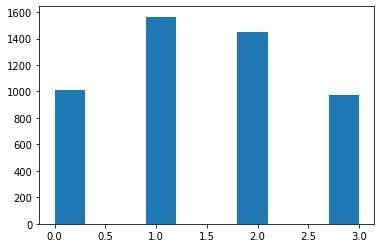

In [8]:
from matplotlib import pyplot as plt

plt.hist(df5["salary_label"])

**Split out train and test data**

In [9]:
from sklearn.model_selection import train_test_split

# Divide into train and test set
X_train, X_test, _, _ = train_test_split(df5, df5, test_size=0.2, shuffle = True, random_state=3919)


print(len(X_train))
print(len(X_test))

3998
1000


In [10]:
X_train.to_csv("TrainData.csv")
X_test.to_csv("TestData.csv")